# ML Project 

### We Can't Choose A Name So This Is The Name The Entire Thing 

### Rey Stone, Mara Backsen, Winter Russell

In [1]:
import pandas as pd
import numpy as np
from helpers import logreg

In [2]:
covid = pd.read_csv('data/Covid Data.csv')
covid.info()
covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
for col in covid.columns : 
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [4]:
print('Percentage of missing values')
for col in covid.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(covid[(covid[col]==98) | (covid[col]==99) | (covid[col]==97)])/len(covid)*100))

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%


In [5]:
covid['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

In [6]:
covid['ICU'].value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [7]:
covid['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [8]:
#Get rid of missing values
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025152 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1025152 non-null  int64 
 1   MEDICAL_UNIT          1025152 non-null  int64 
 2   SEX                   1025152 non-null  int64 
 3   PATIENT_TYPE          1025152 non-null  int64 
 4   DATE_DIED             1025152 non-null  object
 5   INTUBED               1025152 non-null  int64 
 6   PNEUMONIA             1025152 non-null  int64 
 7   AGE                   1025152 non-null  int64 
 8   PREGNANT              1025152 non-null  int64 
 9   DIABETES              1025152 non-null  int64 
 10  COPD                  1025152 non-null  int64 
 11  ASTHMA                1025152 non-null  int64 
 12  INMSUPR               1025152 non-null  int64 
 13  HIPERTENSION          1025152 non-null  int64 
 14  OTHER_DISEASE         1025152 non-null  int64 
 15  CAR

In [9]:
#Transforming DATE_DIED column into a binary column that just displays whether or not the patient died
covid['PATIENT_DIED'] = np.where(covid['DATE_DIED'] == '9999-99-99', 2, 1)
covid = covid.drop('DATE_DIED', axis = 1)
covid['PATIENT_DIED'].value_counts()

PATIENT_DIED
2    950438
1     74714
Name: count, dtype: int64

In [10]:
covid.info()
covid

<class 'pandas.core.frame.DataFrame'>
Index: 1025152 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1025152 non-null  int64
 1   MEDICAL_UNIT          1025152 non-null  int64
 2   SEX                   1025152 non-null  int64
 3   PATIENT_TYPE          1025152 non-null  int64
 4   INTUBED               1025152 non-null  int64
 5   PNEUMONIA             1025152 non-null  int64
 6   AGE                   1025152 non-null  int64
 7   PREGNANT              1025152 non-null  int64
 8   DIABETES              1025152 non-null  int64
 9   COPD                  1025152 non-null  int64
 10  ASTHMA                1025152 non-null  int64
 11  INMSUPR               1025152 non-null  int64
 12  HIPERTENSION          1025152 non-null  int64
 13  OTHER_DISEASE         1025152 non-null  int64
 14  CARDIOVASCULAR        1025152 non-null  int64
 15  OBESITY             

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PATIENT_DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,2


In [11]:
covid.shape

(1025152, 21)

In [12]:
for col in covid.columns:
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
INTUBED              =>          4
PNEUMONIA            =>          2
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
ICU                  =>          4
PATIENT_DIED         =>          2


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
covid['AGE'] = scaler.fit_transform(covid.loc[:, ['AGE']])
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PATIENT_DIED
0,2,1,1,1,97,1,1.379972,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,1.797925,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,0.782898,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,0.663483,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,1.559095,97,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,-0.112715,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,2,2,0.544068,97,2,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,97,2,0.782898,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,97,2,-0.829205,97,2,2,...,2,2,2,2,2,2,2,7,97,2


# Predicting death

Confusion matrix


/Users/rey/Desktop/covid-19/.env/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


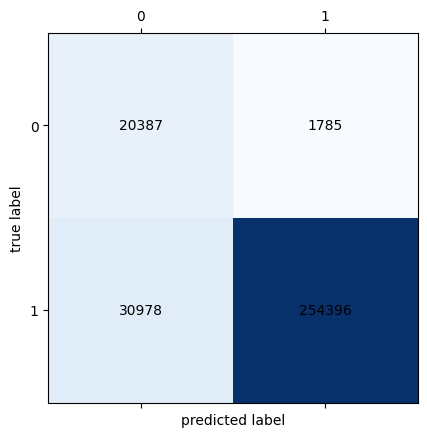

Accuracy
0.8934695947923238
Classification report
              precision    recall  f1-score   support

           1       0.40      0.92      0.55     22172
           2       0.99      0.89      0.94    285374

    accuracy                           0.89    307546
   macro avg       0.69      0.91      0.75    307546
weighted avg       0.95      0.89      0.91    307546



,Feature,Coefficient
0,USMER,0.052041
1,MEDICAL_UNIT,0.108125
2,SEX,-0.307430
3,PATIENT_TYPE,-2.865777
4,PNEUMONIA,1.547991
5,AGE,-0.795054
6,PREGNANT,-0.002357
7,DIABETES,0.359645
8,COPD,-0.141805
9,ASTHMA,-0.418486


In [15]:
# Predicting death

x_death = covid.drop(['PATIENT_DIED', 'ICU', 'INTUBED'], axis=1)
y_death = covid['PATIENT_DIED']

logreg(x_death, y_death)

# Predicting hospitalization 

/Users/rey/Desktop/covid-19/.env/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix


/Users/rey/Desktop/covid-19/.env/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


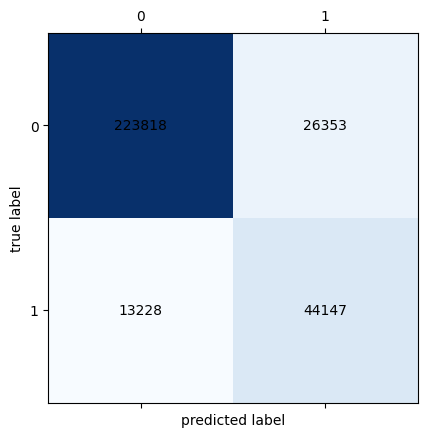

Accuracy
0.8713005534131479
Classification report
              precision    recall  f1-score   support

           1       0.94      0.89      0.92    250171
           2       0.63      0.77      0.69     57375

    accuracy                           0.87    307546
   macro avg       0.79      0.83      0.80    307546
weighted avg       0.88      0.87      0.88    307546



,Feature,Coefficient
0,USMER,-0.603147
1,MEDICAL_UNIT,-0.156840
2,SEX,1.486786
3,PNEUMONIA,-3.344289
4,AGE,0.365195
5,PREGNANT,-0.011851
6,DIABETES,-0.632080
7,COPD,0.854591
8,ASTHMA,1.644461
9,INMSUPR,0.305719


In [16]:
# Predicting hospitalization (patient_type)

x_hos = covid.drop(['PATIENT_DIED','PATIENT_TYPE', 'ICU', 'INTUBED'], axis=1)
y_hos = covid[['PATIENT_TYPE']].to_numpy()

logreg(x_hos, y_hos)

# Predicting ICU

In [17]:
#Get rid of missing values
cols = ['INTUBED', 'PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189746 entries, 2 to 1048571
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 189746 non-null  int64  
 1   MEDICAL_UNIT          189746 non-null  int64  
 2   SEX                   189746 non-null  int64  
 3   PATIENT_TYPE          189746 non-null  int64  
 4   INTUBED               189746 non-null  int64  
 5   PNEUMONIA             189746 non-null  int64  
 6   AGE                   189746 non-null  float64
 7   PREGNANT              189746 non-null  int64  
 8   DIABETES              189746 non-null  int64  
 9   COPD                  189746 non-null  int64  
 10  ASTHMA                189746 non-null  int64  
 11  INMSUPR               189746 non-null  int64  
 12  HIPERTENSION          189746 non-null  int64  
 13  OTHER_DISEASE         189746 non-null  int64  
 14  CARDIOVASCULAR        189746 non-null  int64  
 15  OBES

/Users/rey/Desktop/covid-19/.env/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix


/Users/rey/Desktop/covid-19/.env/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


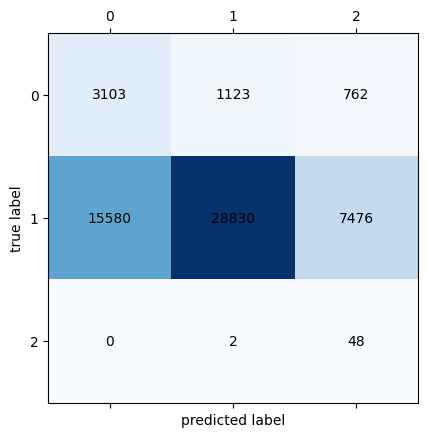

Accuracy
0.5618192677956574
Classification report
              precision    recall  f1-score   support

           1       0.17      0.62      0.26      4988
           2       0.96      0.56      0.70     51886
          99       0.01      0.96      0.01        50

    accuracy                           0.56     56924
   macro avg       0.38      0.71      0.33     56924
weighted avg       0.89      0.56      0.67     56924



,Feature,Coefficient
0,USMER,1.445339
1,MEDICAL_UNIT,0.050815
2,SEX,0.040800
3,PATIENT_TYPE,-0.016401
4,PNEUMONIA,-0.402669
5,AGE,-0.016567
6,PREGNANT,0.000703
7,DIABETES,0.008968
8,COPD,0.177365
9,ASTHMA,-0.050483


In [18]:
# Predicting ICU

x_icu = covid.drop(['PATIENT_DIED', 'INTUBED', 'ICU'], axis=1)
y_icu = covid[['ICU']]

logreg(x_icu, y_icu)